# Asignacion de activos para un portafolio eficiente

In [2]:
# Librerias necesarias
import yfinance as yf
import pandas as pd
import numpy as np
import pyfolio as pf
from scipy.optimize import minimize
from matplotlib import pyplot as plt

## Metodologia 1.

### Evaluacion de rendimiento de 1/N portafolio basico - Usando Pyfolio

In [3]:
# Parametros
lista_acciones = ['META', 'NVDA', 'SBUX','UAL']
start='2023-02-08'
end='2024-02-07'
n = len(lista_acciones)

# Descarga de los datos
prices_df = yf.download(lista_acciones, start=start, end=end, auto_adjust=True)

prices_df

[*********************100%%**********************]  4 of 4 completed


Price            Close                                          High  \
Ticker            META       NVDA        SBUX        UAL        META   
Date                                                                   
2023-02-08  183.053833  22.192287  102.713638  50.770000  190.438667   
2023-02-09  177.555145  22.324213  102.985558  49.820000  186.267239   
2023-02-10  173.792862  21.252825  103.995491  48.860001  178.523147   
2023-02-13  179.062042  21.775524  105.384178  49.189999  180.628830   
2023-02-14  179.111923  22.957850  104.859787  50.060001  181.137759   
...                ...        ...         ...        ...         ...   
2024-01-31  389.339935  61.519058   91.777328  41.380001  397.183802   
2024-02-01  393.970398  63.018867   92.112762  41.500000  399.678669   
2024-02-02  474.015900  66.151466   91.737869  41.369999  484.963404   
2024-02-05  458.467865  69.323059   91.264336  40.009998  470.932241   
2024-02-06  453.787476  68.214203   94.381783  41.230000  466.162040   

Price                                                Low             \
Ticker           NVDA        SBUX        UAL        META       NVDA   
Date                                                                  
2023-02-08  22.864902  102.945539  51.299999  182.544884  21.995400   
2023-02-09  23.006823  103.529373  51.290001  176.906484  22.107338   
2023-02-10  22.065359  104.160584  49.349998  172.994515  20.799086   
2023-02-13  22.035375  105.782334  49.400002  175.459460  20.949997   
2023-02-14  23.035804  105.335626  50.299999  175.519315  21.353767   
...               ...         ...        ...         ...        ...   
2024-01-31  62.260963   97.035561  42.459999  386.306161  60.692165   
2024-02-01  63.182848   92.339661  42.080002  392.243935  61.642046   
2024-02-02  66.591404   92.349524  41.540001  452.080995  63.681780   
2024-02-05  69.488039   91.619489  40.830002  458.278252  67.196334   
2024-02-06  69.745004   94.411377  41.299999  452.071002  66.291454   

Price                                    Open                         \
Ticker            SBUX        UAL        META       NVDA        SBUX   
Date                                                                   
2023-02-08  102.085567  49.380001  189.610367  22.374182  102.732960   
2023-02-09  102.548556  49.610001  185.748316  22.593060  102.674805   
2023-02-10  102.422308  48.400002  175.988363  21.677583  102.470859   
2023-02-13  104.180012  48.630001  177.854532  21.525667  104.345097   
2023-02-14  103.616768  48.849998  176.796689  21.565645  104.811229   
...                ...        ...         ...        ...         ...   
2024-01-31   91.767461  40.860001  388.202259  61.432068   96.956636   
2024-02-01   90.632960  40.369999  393.132124  62.091985   91.846394   
2024-02-02   90.435644  40.900002  458.657477  63.965744   91.441913   
2024-02-05   90.662549  39.980000  468.916395  68.216200   91.530697   
2024-02-06   91.106487  39.709999  463.048443  69.621019   91.254469   

Price                    Volume                                
Ticker            UAL      META       NVDA      SBUX      UAL  
Date                                                           
2023-02-08  50.980000  36139100  559651000   5557500  7367400  
2023-02-09  50.980000  37118800  523876000   5608400  5215700  
2023-02-10  49.119999  33433600  550737000   6298600  6144100  
2023-02-13  48.869999  31463200  474919000   5192400  4356400  
2023-02-14  49.049999  24034600  675474000   5109400  6199600  
...               ...       ...        ...       ...      ...  
2024-01-31  41.400002  20180800  453795000  26751800  7855900  
2024-02-01  41.689999  29727100  369146000  15001500  7493200  
2024-02-02  41.320000  84615500  476578000  11365900  5737000  
2024-02-05  40.759998  40832400  680078000   7335800  8629100  
2024-02-06  39.860001  21655200  683111000  11531500  6553600  

[250 rows x 20 columns]

In [4]:
# Calculo de los rendimientos individuales de las acciones
returns = prices_df['Close'].pct_change().dropna()

returns

Ticker,META,NVDA,SBUX,UAL
Date,,,,
2023-02-09,-0.030039,0.005945,0.002647,-0.018712
2023-02-10,-0.021189,-0.047992,0.009807,-0.019269
2023-02-13,0.030319,0.024594,0.013353,0.006754
2023-02-14,0.000279,0.054296,-0.004976,0.017687
2023-02-15,-0.012926,-0.009011,0.009446,-0.002996
...,...,...,...,...
2024-01-31,-0.024796,-0.019865,-0.011161,-0.006721
2024-02-01,0.011893,0.024380,0.003655,0.002900
2024-02-02,0.203176,0.049709,-0.004070,-0.003133


Start date,2023-02-09
End date,2024-02-06
Total months,11
,Backtest
Annual return,61.165%
Cumulative returns,60.252%
Annual volatility,23.965%
Sharpe ratio,2.11
Calmar ratio,3.49
Stability,0.68
Max drawdown,-17.527%


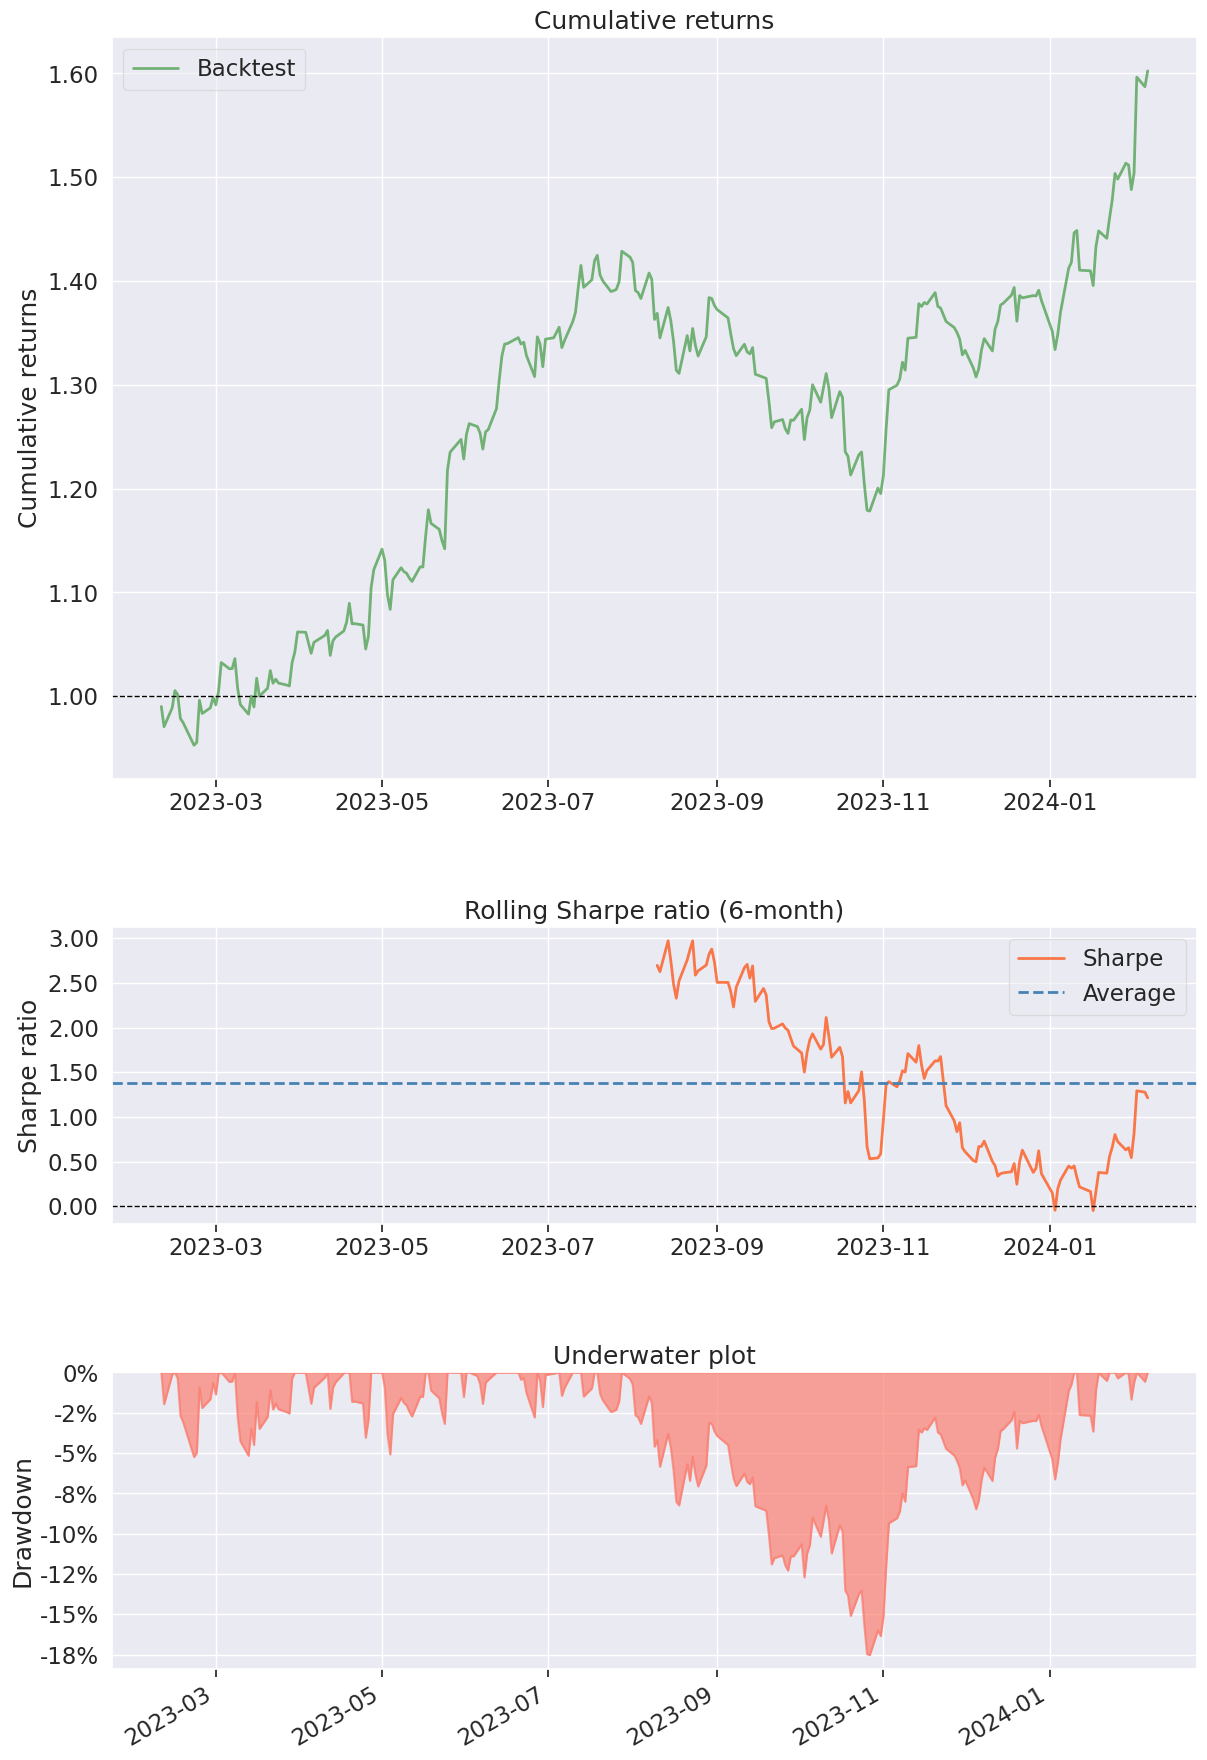

In [5]:
# Definir los pesos y las participaciones
portfolio_weights = n * [1/n]

# Calculo de los rendimientos del portafolio
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), index=returns.index)

# Crear la hoja de lagrimas
pf.create_simple_tear_sheet(portfolio_returns)

### Encontrar la frontera eficiente usando simulacion de montecarlo

[*********************100%%**********************]  4 of 4 completed


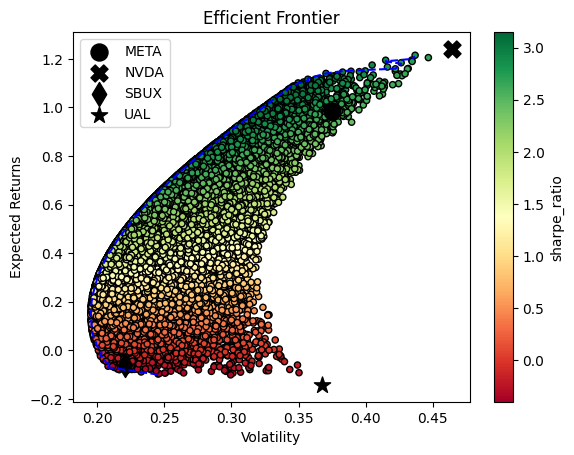

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Configuracion de parametros
num_portfolios = 10**5
num_days = 252
lista_acciones = ['META', 'NVDA', 'SBUX', 'UAL']
start = '2023-02-08'
end = '2024-02-07'
n = len(lista_acciones)

# Obtencion de datos
prices_df = yf.download(lista_acciones, start=start, end=end, auto_adjust=True)

# Calculo rendimientos y desviacion estandar anualizados
returns_df = prices_df['Close'].pct_change().dropna()
avg_returns = returns_df.mean() * num_days
cov_mat = returns_df.cov() * num_days

# Simulacion de ponderaciones de portafolio aleatorios
np.random.seed(42)
weights = np.random.random(size=(num_portfolios, n))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

# Calculo de metricas del portafolio
portf_rtns = np.dot(weights, avg_returns)
portf_vol = []

for i in range(len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))

portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

# DataFrame que contenga todos los datos
portf_results_df = pd.DataFrame({
    'returns': portf_rtns,
    'volatility': portf_vol,
    'sharpe_ratio': portf_sharpe_ratio
})

# Localice los puntos que crean la frontera eficiente
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []
portf_rtns_ef = np.linspace(portf_results_df.returns.min(), portf_results_df.returns.max(), N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

# Graficar la frontera eficiente
MARKS = ['o', 'X', 'd', '*']
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio', cmap='RdYlGn', edgecolors='black', ax=ax)
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')

for asset_index in range(n):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
               y=avg_returns[asset_index],
               marker=MARKS[asset_index],
               s=150, color='black',
               label=lista_acciones[asset_index])

ax.legend()
plt.show()


In [7]:
# Resultados de portafolios simulados
portf_results_df

,returns,volatility,sharpe_ratio
0,0.534459,0.252623,2.115637
1,0.178395,0.295736,0.603224
2,0.579498,0.286173,2.024994
3,0.743256,0.279842,2.655982
4,0.569287,0.249548,2.281274
...,...,...,...
99995,0.653743,0.278872,2.344242
99996,0.299204,0.253307,1.181192
99997,0.651986,0.252686,2.580224
99998,0.391761,0.225350,1.738455


In [8]:
# Portafolio de maximo Sharpe Ratio
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]
min_vol_ind = np.argmin (portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

#También podemos investigar los componentes de estas portafolios:
print( 'Maximum Sharpe ratio portfolio ----')
print( 'Performance' )
for index, value in max_sharpe_portf.items():
    print (f' {index}: {100 * value: 2f}% ', end="", flush=True)
print( '\nWeights')
for x, y in zip(lista_acciones,weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print (f' {x}: {100*y: 2f}% ', end="", flush=True)

Maximum Sharpe ratio portfolio ----
Performance
 returns:  110.106097%  volatility:  34.965509%  sharpe_ratio:  314.899170% 
Weights
 META:  52.873529%  NVDA:  46.689002%  SBUX:  0.300059%  UAL:  0.137410% 

In [9]:
# Portafolio de minima volatilidad
print( 'Minimum Volatility portfolio----')
print( 'Performance' )
for index, value in min_vol_portf.items():
    print (f' {index}: {100 * value: 2f}% ', end="", flush=True)
print( '\nWeights')
for x, y in zip(lista_acciones,weights[np.argmin(portf_results_df.volatility)]):
    print (f' {x}: {100*y: 2f}% ', end="", flush=True)

Minimum Volatility portfolio----
Performance
 returns:  14.564385%  volatility:  19.505321%  sharpe_ratio:  74.668776% 
Weights
 META:  15.505249%  NVDA:  4.303765%  SBUX:  65.849443%  UAL:  14.341543% 

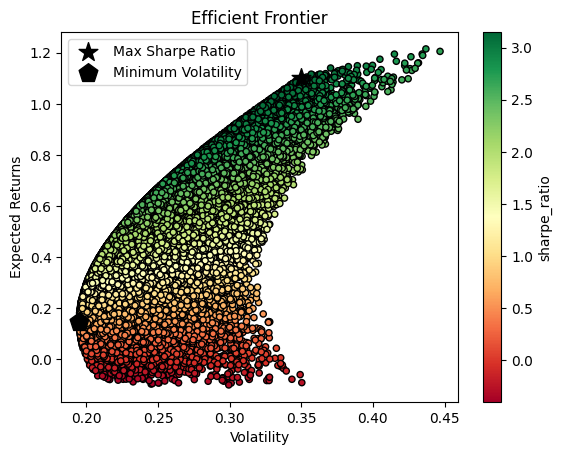

In [10]:
# Graficar la frontera eficiente
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio', cmap='RdYlGn', edgecolors='black', ax=ax)
ax.scatter(x=max_sharpe_portf.volatility, y=max_sharpe_portf.returns, c='black', marker="*", s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility, y=min_vol_portf.returns, c='black', marker='p', s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
ax.legend()
plt.show()

## Metodologia 2.

### Evaluacion de rendimiento de 1/N portafolio basico - Sin usar Pyfolio

In [11]:
lista_acciones = ['META', 'NVDA', 'SBUX','UAL']
df_prices = pd.DataFrame()

i = 0
for accion in lista_acciones:
    if i==0:
        tick = yf.Ticker(accion)
        tick_history = tick.history(start='2022-01-01', end='2024-01-01', interval='1d')
        tick_history = tick_history.loc[:,['Close']]
        tick_history.rename(columns={'Close':accion}, inplace=True)
        df_prices = df_prices.join(tick_history, how='outer')
        i += 1
        
    else:
        
        tick = yf.Ticker(accion)
        tick_history = tick.history(start='2022-01-01', end='2024-01-01', interval='1d')
        tick_history = tick_history.loc[:,['Close']]
        tick_history.rename(columns={'Close':accion}, inplace=True)
        df_prices = df_prices.join(tick_history, how='inner')

df_returns = pd.DataFrame(columns=lista_acciones)

for accion in lista_acciones:
    for column in df_returns.columns:
        if accion == column:
            df_returns[column] = df_prices[column].pct_change()  

df_returns

,META,NVDA,SBUX,UAL
Date,,,,
2022-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,-0.005937,-0.027589,-0.020912,0.016707
2022-01-05 00:00:00-05:00,-0.036728,-0.057562,-0.033263,-0.010162
2022-01-06 00:00:00-05:00,0.025573,0.020794,0.006338,-0.000218
2022-01-07 00:00:00-05:00,-0.002015,-0.033040,-0.032122,0.033647
...,...,...,...,...
2023-12-22 00:00:00-05:00,-0.001977,-0.003266,-0.000525,-0.000705
2023-12-26 00:00:00-05:00,0.004075,0.009195,0.004093,-0.011046
2023-12-27 00:00:00-05:00,0.008455,0.002800,-0.003972,-0.008318


In [12]:
# Matriz de correlacion
mat_corr = df_returns.corr()
mat_corr

,META,NVDA,SBUX,UAL
META,1.000000,0.545256,0.412633,0.349687
NVDA,0.545256,1.000000,0.500723,0.476501
SBUX,0.412633,0.500723,1.000000,0.467274
UAL,0.349687,0.476501,0.467274,1.000000


In [13]:
# Matriz de varianza y covarianza
mat_cov = df_returns.cov()
mat_cov

,META,NVDA,SBUX,UAL
META,0.001151,0.000660,0.000265,0.000346
NVDA,0.000660,0.001271,0.000338,0.000495
SBUX,0.000265,0.000338,0.000357,0.000257
UAL,0.000346,0.000495,0.000257,0.000848


In [14]:
lista_acciones = ['META', 'NVDA', 'SBUX','UAL']
pesos = n * [1/n]

columns = lista_acciones
indices = ['pesos', 'rentabilidad_diaria_promedio', 'desviacion_diaria_promedio']

# Creacion de datafrane
metricas_portafolio = pd.DataFrame(columns=columns, index=indices)

# Asignacion de pesos
metricas_portafolio.loc['pesos',:] = pesos    
metricas_portafolio['Portfolio'] = 0
metricas_portafolio.loc['pesos', ['Portfolio']] = metricas_portafolio.loc['pesos',:].sum()

# Asignacion de rentabilidades
pesos_np = np.array(pesos) 
df_returns_mean = df_returns.mean()
metricas_portafolio.loc['rentabilidad_diaria_promedio',:'Portfolio'] = df_returns_mean
metricas_portafolio.loc['rentabilidad_diaria_promedio',['Portfolio']] = np.dot(df_returns_mean, pesos_np.T)

# Asignacion de desviaciones
df_returns_desv = df_returns.std()
metricas_portafolio.loc['desviacion_diaria_promedio',:'Portfolio'] = df_returns_desv
desv_portf = np.sqrt(np.dot(pesos, np.dot(cov_mat, pesos_np.T)))
metricas_portafolio.loc['desviacion_diaria_promedio',['Portfolio']] = desv_portf
metricas_portafolio

,META,NVDA,SBUX,UAL,Portfolio
pesos,0.25,0.25,0.25,0.25,1.000000
rentabilidad_diaria_promedio,0.00068,0.001621,-0.000124,0.000231,0.000602
desviacion_diaria_promedio,0.033929,0.035657,0.018907,0.029122,0.239648


### Encontrar la frontera eficiente usando optimizacion con scipy

In [15]:
# Inicializar el DataFrame para los resultados
num_assets = len(lista_acciones)
pesos_iniciales = np.ones(num_assets) / num_assets

def objective(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_mat, weights)))

def constraint_sum(weights):
    return np.sum(weights) - 1

def constraint_return(weights, target_return):
    return np.dot(weights, df_returns_mean) - target_return

def optimize_portfolio(target_return):
    constraints = [
        {'type': 'eq', 'fun': constraint_sum},
        {'type': 'eq', 'fun': constraint_return, 'args': (target_return,)}
    ]
    bounds = [(0, 1) for _ in range(num_assets)]
    result = minimize(objective, pesos_iniciales, bounds=bounds, constraints=constraints)
    optimal_weights = result.x
    optimal_risk = objective(optimal_weights)
    return optimal_risk, optimal_weights

# Inicializar DataFrame para la frontera eficiente
maxima = np.max(df_returns_mean)
minima = np.min(df_returns_mean)
num_escenarios = 100
factor = (maxima - minima) / (num_escenarios - 1)
escenarios = [minima + i * factor for i in range(num_escenarios)]

columns = ['Rentabilidad', 'Riesgo'] + lista_acciones
frontera_eficiente = pd.DataFrame(columns=columns, index=range(num_escenarios))

# Llenar el DataFrame con resultados de la frontera eficiente
for i in range(num_escenarios):
    rentabilidad = maxima - i * factor
    riesgo, pesos_optimos = optimize_portfolio(rentabilidad)
    frontera_eficiente.loc[i, 'Rentabilidad'] = rentabilidad
    frontera_eficiente.loc[i, 'Riesgo'] = riesgo
    frontera_eficiente.loc[i, lista_acciones] = pesos_optimos

# Reordenar el DataFrame de mayor a menor rentabilidad
frontera_eficiente = frontera_eficiente.sort_values(by='Rentabilidad', ascending=False)

# Resetear el índice para que sea numérico consecutivo
frontera_eficiente.reset_index(drop=True, inplace=True)

print(frontera_eficiente)


   Rentabilidad    Riesgo      META      NVDA      SBUX       UAL
0      0.001621  0.464175       0.0       1.0       0.0       0.0
1      0.001604  0.458455   0.01872   0.98128       0.0       0.0
2      0.001586  0.452826   0.03744   0.96256       0.0       0.0
3      0.001568  0.447292   0.05616   0.94384       0.0       0.0
4      0.001551  0.441856  0.074879  0.925121       0.0       0.0
..          ...       ...       ...       ...       ...       ...
95    -0.000053  0.205425  0.038269       0.0  0.849731     0.112
96    -0.000071  0.208155  0.018535       0.0  0.874457  0.107008
97    -0.000089  0.211193       0.0       0.0  0.900695  0.099305
98    -0.000106  0.215232       0.0       0.0  0.950348  0.049652
99    -0.000124  0.220791       0.0       0.0       1.0       0.0

[100 rows x 6 columns]


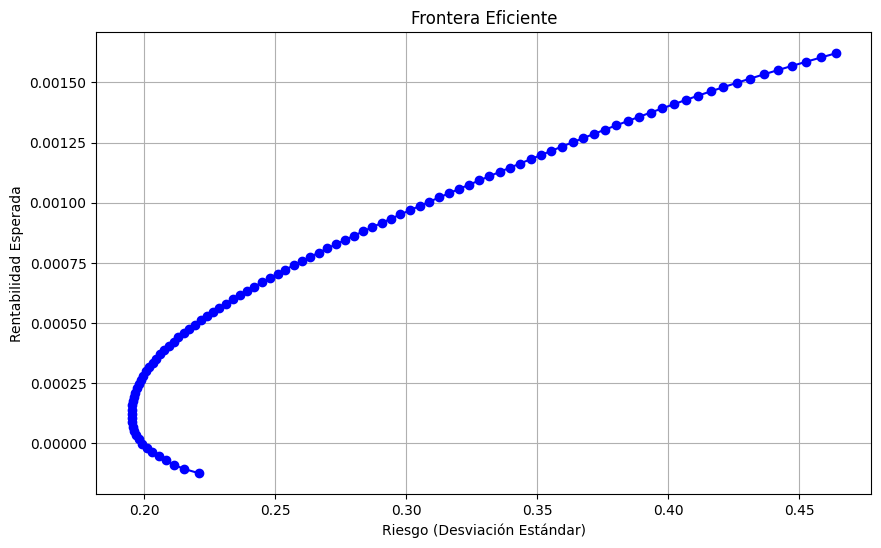

In [16]:
# Graficar frontera eficiente
plt.figure(figsize=(10, 6))
plt.plot(frontera_eficiente['Riesgo'], frontera_eficiente['Rentabilidad'], marker='o', linestyle='-', color='b')

# Etiquetas y título
plt.xlabel('Riesgo (Desviación Estándar)')
plt.ylabel('Rentabilidad Esperada')
plt.title('Frontera Eficiente')
plt.grid(True)

# Mostrar la gráfica
plt.show()

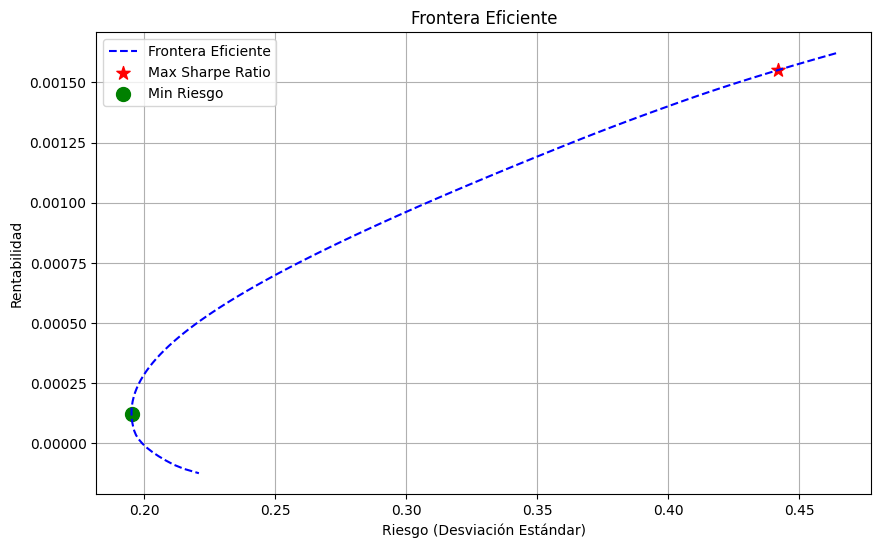


Portafolio de Máximo Sharpe Ratio:
Rentabilidad: 0.0015508391963808847
Riesgo: 0.44185554084509815
Sharpe Ratio: 0.003283514774095607
Pesos: [7.48793345e-02 9.25120665e-01 0.00000000e+00 8.32667268e-17]

Portafolio de Mínimo Riesgo:
Rentabilidad: 0.00012285391241664335
Riesgo: 0.19504892116366165
Sharpe Ratio: 0.00011717015546816115
Pesos: [0.15955009 0.03863793 0.65769932 0.14411267]


In [19]:
# Definir la tasa libre de riesgo 
tasa_libre_riesgo = 0.0001  # Ejemplo: 0.01%

frontera_eficiente['Rentabilidad'] = pd.to_numeric(frontera_eficiente['Rentabilidad'], errors='coerce')
frontera_eficiente['Riesgo'] = pd.to_numeric(frontera_eficiente['Riesgo'], errors='coerce')

# Calcular el Sharpe Ratio 
frontera_eficiente['Sharpe Ratio'] = (frontera_eficiente['Rentabilidad'] - tasa_libre_riesgo) / frontera_eficiente['Riesgo']

# Eliminar filas con valores NaN o infinitos
frontera_eficiente = frontera_eficiente.replace([float('inf'), float('-inf')], float('nan')).dropna()

# Asegurarse de que la columna Sharpe Ratio existe y es numérica
if 'Sharpe Ratio' in frontera_eficiente.columns:
    frontera_eficiente['Sharpe Ratio'] = pd.to_numeric(frontera_eficiente['Sharpe Ratio'], errors='coerce')

    # Verificar si hay datos válidos en 'Sharpe Ratio'
    if not frontera_eficiente['Sharpe Ratio'].isna().all():
        # Encontrar el índice del portafolio con el mayor Sharpe Ratio
        max_sharpe_idx = frontera_eficiente['Sharpe Ratio'].idxmax()
        portafolio_max_sharpe = frontera_eficiente.loc[max_sharpe_idx]

        # Encontrar el índice del portafolio con el menor Riesgo
        min_riesgo_idx = frontera_eficiente['Riesgo'].idxmin()
        portafolio_min_riesgo = frontera_eficiente.loc[min_riesgo_idx]

        # Graficar la frontera eficiente
        plt.figure(figsize=(10, 6))
        plt.plot(frontera_eficiente['Riesgo'], frontera_eficiente['Rentabilidad'], 'b--', label='Frontera Eficiente')
        plt.scatter(portafolio_max_sharpe['Riesgo'], portafolio_max_sharpe['Rentabilidad'], color='red', marker='*', s=100, label='Max Sharpe Ratio')
        plt.scatter(portafolio_min_riesgo['Riesgo'], portafolio_min_riesgo['Rentabilidad'], color='green', marker='o', s=100, label='Min Riesgo')

        # Añadir etiquetas y leyenda
        plt.title('Frontera Eficiente')
        plt.xlabel('Riesgo (Desviación Estándar)')
        plt.ylabel('Rentabilidad')
        plt.legend()
        plt.grid(True)

        # Mostrar gráfico
        plt.show()

        # Mostrar los detalles de los portafolios
        print("\nPortafolio de Máximo Sharpe Ratio:")
        print(f"Rentabilidad: {portafolio_max_sharpe['Rentabilidad']}")
        print(f"Riesgo: {portafolio_max_sharpe['Riesgo']}")
        print(f"Sharpe Ratio: {portafolio_max_sharpe['Sharpe Ratio']}")
        print(f"Pesos: {portafolio_max_sharpe[lista_acciones].values}")

        print("\nPortafolio de Mínimo Riesgo:")
        print(f"Rentabilidad: {portafolio_min_riesgo['Rentabilidad']}")
        print(f"Riesgo: {portafolio_min_riesgo['Riesgo']}")
        print(f"Sharpe Ratio: {portafolio_min_riesgo['Sharpe Ratio']}")
        print(f"Pesos: {portafolio_min_riesgo[lista_acciones].values}")
    else:
        print("La columna 'Sharpe Ratio' no contiene datos válidos.")
else:
    print("La columna 'Sharpe Ratio' no existe en el DataFrame.")
